In [25]:
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import numpy as np
tokenizer = RegexpTokenizer(r'\w+')

открываем тексты, считываем оттуда слова, подсчитываем количество слов разной длинны, в процессе будем выводить интересные факты, такие как кол-во слов и т.д.

In [15]:
l = ['ru', 'en', 'fr']
files = {i: open(i + '.txt') for i in l}
texts = {i: files[i].read() for i in l}
words = {i: tokenizer.tokenize(texts[i]) for i in l}
words_len = {i: [len(w) for w in words[i]] for i in l}
for i in words_len:
    print('in %s text is %d words' % (i, len(words_len[i])))

in ru text is 271282 words
in en text is 358646 words
in fr text is 135312 words


не знаю как посчитать кол-во слов такой-то длинны в массиве, поэтому напишу вручную, предварительно найдя максимальную длинну, а потом составя словарь со всеми длинами до этой и перебирая все массивы сделаю что-то подобное сортировке подсчётом

In [22]:
lenght_count = {i: {n: 0 for n in range(max(words_len[i]) + 1)} for i in l}
for i in l:
    print('max len of words in %s lenguage is %d' % (i,max(words_len[i])))

for i in l:
    for a in words_len[i]:
        lenght_count[i][a] += 1 

max len of words in ru lenguage is 23
max len of words in en lenguage is 19
max len of words in fr lenguage is 18


посмотрим на распределения сначала просто на словари, потом отобразив их на гистограммы 

In [23]:
for i in l:
    print(lenght_count[i])

{0: 0, 1: 31129, 2: 35857, 3: 37959, 4: 26716, 5: 31337, 6: 30603, 7: 24664, 8: 18929, 9: 12851, 10: 8958, 11: 5336, 12: 3122, 13: 2311, 14: 857, 15: 342, 16: 173, 17: 66, 18: 46, 19: 13, 20: 5, 21: 4, 22: 3, 23: 1}
{0: 0, 1: 16301, 2: 61491, 3: 93329, 4: 63733, 5: 37489, 6: 25159, 7: 24195, 8: 15081, 9: 8890, 10: 6342, 11: 2440, 12: 2430, 13: 758, 14: 857, 15: 113, 16: 31, 17: 5, 18: 0, 19: 2}
{0: 0, 1: 10599, 2: 33907, 3: 18085, 4: 18393, 5: 13767, 6: 11477, 7: 10380, 8: 7609, 9: 4738, 10: 2979, 11: 1434, 12: 1048, 13: 410, 14: 353, 15: 69, 16: 56, 17: 6, 18: 2}


видно что не смотря на то, что самые длинные слова встречаются в русском языке их относительно немного, построим гистограммы отдельно и вместе

In [30]:
np.array(lenght_count[i])

array({0: 0, 1: 31129, 2: 35857, 3: 37959, 4: 26716, 5: 31337, 6: 30603, 7: 24664, 8: 18929, 9: 12851, 10: 8958, 11: 5336, 12: 3122, 13: 2311, 14: 857, 15: 342, 16: 173, 17: 66, 18: 46, 19: 13, 20: 5, 21: 4, 22: 3, 23: 1},
      dtype=object)

ru
en
fr


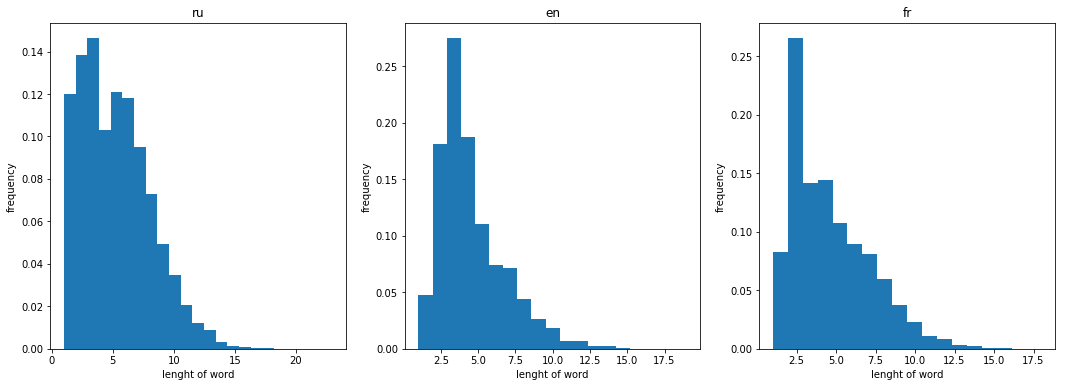

In [50]:
axes = {}
fig, (axes['ru'], axes['en'], axes['fr']) = plt.subplots(
    nrows=1, ncols=3,
    figsize=(18, 6)
)
for i in l:
    axes[i].hist(words_len[i], bins = max(words_len[i]), density=True)
    axes[i].set_title(i)
    axes[i].set_xlabel('lenght of word')
    axes[i].set_ylabel('frequency')
plt.show()

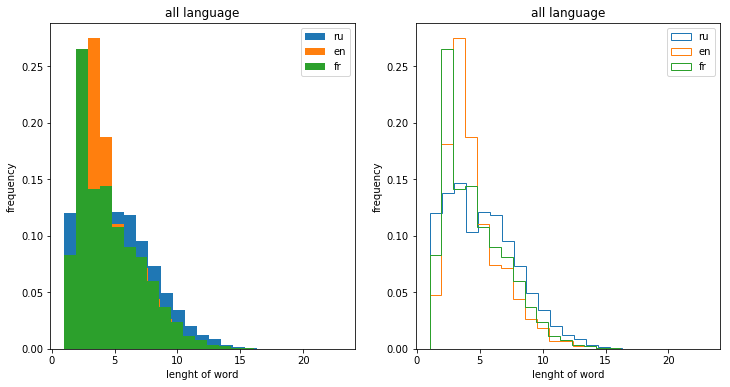

In [67]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(12, 6)
)

for i in l:
    ax1.hist(words_len[i], bins = max(words_len[i]), density=True, label=str(i), histtype='bar')
ax1.legend()
ax1.set_title('all language')
ax1.set_xlabel('lenght of word')
ax1.set_ylabel('frequency')

for i in l:
    ax2.hist(words_len[i], bins = max(words_len[i]), density=True, label=str(i), histtype='step')
ax2.legend()
ax2.set_title('all language')
ax2.set_xlabel('lenght of word')
ax2.set_ylabel('frequency')

plt.show()

видно что  у русского языка более равномерное распределение, без такого выраженного пика как у французского или английского.

теперь опробуем моё предположение о возможности использования закона больших чисел, установив с его помощью распределение и, затем проверив это всё с помощью критерия согласия Пирсона.

замечу, что так как слова состоят как минимум из 1 буквы, будем считать, что случайная величина - это кол-во букв - 1, то есть сколько букв прибавится к однобуквенному слову.

In [108]:
ar_lenghts = {i: np.array(list(lenght_count[i].values())[1:]) for i in l}
lambdas = {i: 0 for i in l}
for i in l:
    s = 0
    for fl in range(len(ar_lenghts[i])):
        s += fl*ar_lenghts[i][fl]
    lambdas[i] = s/len(words[i])
print('получили след. предположительные параметры распределений', lambdas)
import scipy.stats as st

получили след. предположительные параметры распределений {'ru': 3.946052447268894, 'en': 3.2554775461039576, 'fr': 3.3646683221000355}


In [109]:
ar_lenghts

{'ru': array([31129, 35857, 37959, 26716, 31337, 30603, 24664, 18929, 12851,
         8958,  5336,  3122,  2311,   857,   342,   173,    66,    46,
           13,     5,     4,     3,     1]),
 'en': array([16301, 61491, 93329, 63733, 37489, 25159, 24195, 15081,  8890,
         6342,  2440,  2430,   758,   857,   113,    31,     5,     0,
            2]),
 'fr': array([10599, 33907, 18085, 18393, 13767, 11477, 10380,  7609,  4738,
         2979,  1434,  1048,   410,   353,    69,    56,     6,     2])}

In [110]:
ar = {i:[] for i in l}
p_s = {i: st.poisson(lambdas[i]) for i in l}
for i in l:
    for n in range(ar_lenghts[i].shape[0]):
        ar[i] += [p_s[i].pmf(n)]
np_ar = {i:np.array(ar[i]) for i in l}
for i in l:
    print(st.chisquare(ar_lenghts[i], np_ar[i]*ar_lenghts[i].sum()))

Power_divergenceResult(statistic=338897.44596424856, pvalue=0.0)
Power_divergenceResult(statistic=187272.09499276057, pvalue=0.0)
Power_divergenceResult(statistic=120073.64588596781, pvalue=0.0)


по всей видимости закон больших чисел здесь не применим, хотя мне скорее кажется непреминимым критерий пирсона, слишком большие исходные величины, ведь квадрат величины начинает очень сильно влиять, кроме того, попробуем объединить крайние клетки, так как там слишком малые значения.

In [111]:
ar_lenghts['ru'][-5] = np.sum(ar_lenghts['ru'][-5:])
ar_lenghts['en'][-4] = np.sum(ar_lenghts['en'][-4:])
ar_lenghts['fr'][-3] = np.sum(ar_lenghts['fr'][-3:])
ar_lenghts['ru'] = ar_lenghts['ru'][:-4]
ar_lenghts['en'] = ar_lenghts['en'][:-3]
ar_lenghts['fr'] = ar_lenghts['fr'][:-2]
ar_lenghts

{'ru': array([31129, 35857, 37959, 26716, 31337, 30603, 24664, 18929, 12851,
         8958,  5336,  3122,  2311,   857,   342,   173,    66,    46,
           26]),
 'en': array([16301, 61491, 93329, 63733, 37489, 25159, 24195, 15081,  8890,
         6342,  2440,  2430,   758,   857,   113,    38]),
 'fr': array([10599, 33907, 18085, 18393, 13767, 11477, 10380,  7609,  4738,
         2979,  1434,  1048,   410,   353,    69,    64])}

In [112]:
ar = {i:[] for i in l}
p_s = {i: st.poisson(lambdas[i]) for i in l}
for i in l:
    for n in range(ar_lenghts[i].shape[0]):
        ar[i] += [p_s[i].pmf(n)]
np_ar = {i:np.array(ar[i]) for i in l}
for i in l:
    print(st.chisquare(ar_lenghts[i], np_ar[i]*ar_lenghts[i].sum()))

Power_divergenceResult(statistic=295870.04401886417, pvalue=0.0)
Power_divergenceResult(statistic=186870.68857343128, pvalue=0.0)
Power_divergenceResult(statistic=122488.1135112765, pvalue=0.0)


ничего существенно не поменялось, тогда данный способ оказался бесперспективным, попробуем просто бутстреп

In [135]:
from arch.bootstrap import IIDBootstrap

print(type(np.array(words['ru'])))
a = {}
for i in l:
    bs = IIDBootstrap(np.array(words_len[i]))
    a[i] = bs.conf_int(np.mean, 100, method='basic') - [1,1]
a

<class 'numpy.ndarray'>


{'ru': array([[3.93684699, 3.93684699],
        [3.95764122, 3.95764122]]), 'en': array([[3.24862497, 3.24862497],
        [3.26265614, 3.26265614]]), 'fr': array([[3.34975649, 3.34975649],
        [3.37647178, 3.37647178]])}

интервалы не пересекаются, видимо распределения различны, если считать, что они пуассоновские.